In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Cleaning up missing values in dataset v1

In [37]:
path_v1 = "MMU_Iris_v1"
empty_folders = []
for folder in os.listdir(path_v1):
    folder_path = os.path.join(path_v1, folder)
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(path_v1, folder, subfolder)
        if len(os.listdir(subfolder_path)) == 0:
            os.rmdir(subfolder_path)
    if len(os.listdir(folder_path)) == 0:
        empty_folders.append(folder)
        os.rmdir(folder_path)
empty_folders             

['4']

In [38]:
# rename all directories after "4" to form successive numbers
dirs_sorted_by_num = sorted(list(map(int, os.listdir(path_v1))))
for folder in dirs_sorted_by_num:
    if folder > 4:
        path_old = os.path.join(path_v1, str(folder))
        path_new = os.path.join(path_v1, str(folder - 1))
        os.rename(path_old, path_new)

Arrange all files from v2 into separate folders with "left" and "right" subfolders corresponding to left/right eyes

In [39]:
path_v2 = "MMU_Iris_v2"
for file in os.listdir(path_v2):
    person_n = int(file[:-7]) // 10
    lr = "right" if file[-7] == "1" else "left"
    if not os.path.exists(os.path.join(path_v2, str(person_n))):
        os.makedirs(os.path.join(path_v2, str(person_n)))
    if not os.path.exists(os.path.join(path_v2, str(person_n), lr)):
        os.makedirs(os.path.join(path_v2, str(person_n), lr))
    os.rename(os.path.join(path_v2, file), os.path.join(path_v2, str(person_n), lr, file))

Analysis of dataset content

In [48]:
VERSION = 1
root = "MMU_Iris_v" + str(VERSION)
images = []
class_names = []
for i in range(len(os.listdir(root))):
    for subfolder in os.listdir(os.path.join(root, str(i + 1))): 
        class_name = f"{i + 1}|{subfolder}"
        for file in os.listdir(os.path.join(root, str(i + 1), subfolder)):
            if file.endswith('.bmp'):
                image_path= os.path.join(root, str(i + 1), subfolder, file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = np.array(image).astype('float32')
                image /= 255.0
                images.append(image)
                class_names.append(class_name)

In [49]:
# some important info
print(f"Total number of images: {len(images)}")
print(f"Number of persons: {len(os.listdir(root))}")
print(f"Number of unique classes: {len(np.unique(class_names))}")
print(f"Image size: {images[0].shape}")
print("Image file type: .bmp")

Total number of images: 450
Number of persons: 45
Number of unique classes: 90
Image size: (240, 320)
Image file type: .bmp


Visualization:

Text(0.5, 0.98, '45 distinct irises in the dataset')

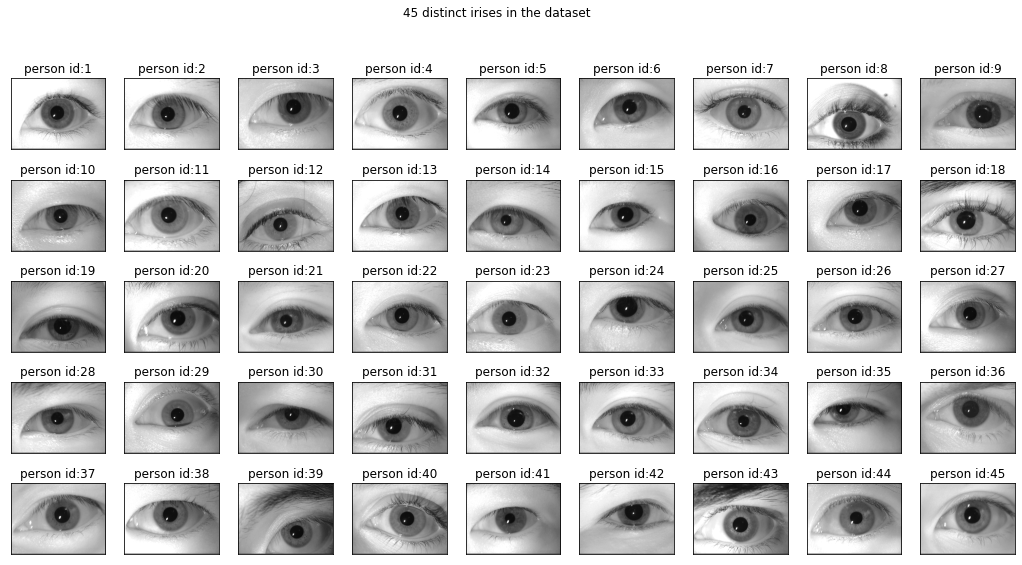

In [50]:
fig, ax = plt.subplots(nrows=5, ncols=9, figsize=(18, 9))
ax = ax.flatten()
for i in range(45):
    image_index = i * 10
    ax[i].imshow(images[image_index], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f"person id:{i + 1}")
plt.suptitle("45 distinct irises in the dataset")        

Text(0.5, 0.98, '50 irises from 5 persons')

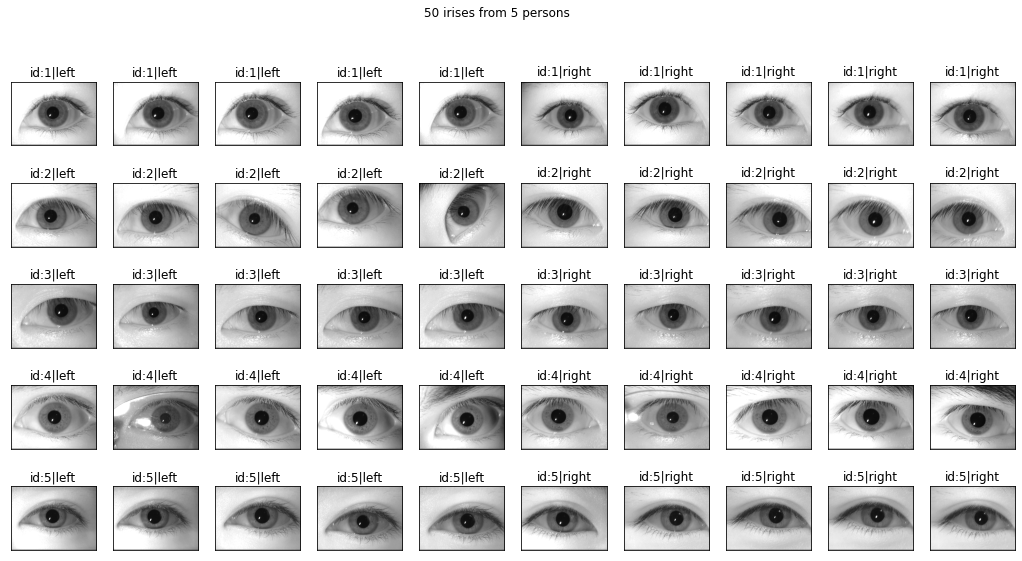

In [51]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(18, 9))
ax = ax.flatten()
for i in range(50):
    person_id = i // 10 + 1
    eye_lr = "left" if i % 10 < 5 else "right"
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f"id:{person_id}|{eye_lr}")
plt.suptitle("50 irises from 5 persons")